## Finding markers on the sex chromosome in <i>Hyla orientalis</i>

Ok, so far we have done a phylogeography using ~10,000 markers. 

Now I want to map those markers to scaffolds in the <i>Hyla arborea</i> genome which have been mapped to LG1 using a linkage map (I have these scaffold names).

So here I will:

1. Get scaffold names that are on LG1

2. Map all RADtags to these scaffolds. 

3. Filter VCF and .gen files for just these loci

We can then use the filtered files to find the male and female Fstats per population, using something like adegenet. 



In [104]:
%load_ext rpy2.ipython

In [13]:
## Getting scaffold names that are on H. arborea Chr 01

Harb_maps = open("/home/djeffrie/Data/Genomes/Hyla/hyla_arborea_linkage_maps.txt", 'r').readlines()

Chrom_1_harb_scaffs = []

for i in Harb_maps[1:]:
    Xen_scaff = i.split()[3]
    if Xen_scaff == "scaffold_1":
        Chrom_1_harb_scaffs.append(i.split()[2])
Chrom_1_harb_scaffs = set(Chrom_1_harb_scaffs)

In [50]:
Chrom_1_harb_scaffs

{'scaffold1000188',
 'scaffold1003840',
 'scaffold1004672',
 'scaffold1004884',
 'scaffold100612',
 'scaffold1007365',
 'scaffold1008769',
 'scaffold1009238',
 'scaffold101',
 'scaffold1024125',
 'scaffold1029538',
 'scaffold1030986',
 'scaffold1033690',
 'scaffold1035724',
 'scaffold103707',
 'scaffold104040',
 'scaffold104917',
 'scaffold1053012',
 'scaffold1053407',
 'scaffold1054739',
 'scaffold1055051',
 'scaffold1057470',
 'scaffold1059263',
 'scaffold106131',
 'scaffold106141',
 'scaffold106565',
 'scaffold1069241',
 'scaffold107021',
 'scaffold1075982',
 'scaffold1076988',
 'scaffold107738',
 'scaffold1078947',
 'scaffold107900',
 'scaffold108194',
 'scaffold1087059',
 'scaffold109008',
 'scaffold1091324',
 'scaffold1091471',
 'scaffold1091907',
 'scaffold109414',
 'scaffold11005',
 'scaffold110263',
 'scaffold1103163',
 'scaffold1103225',
 'scaffold110355',
 'scaffold1112102',
 'scaffold1112303',
 'scaffold1112790',
 'scaffold1118151',
 'scaffold1118394',
 'scaffold113049',
 '

In [23]:
## Now map all of the RADtags to the genome.

## First get the loci of interest from the catalog and put into a fasta

vcf = open("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/batch_1.vcf").readlines()

vcf_tags = []

for line in vcf[10:]:
    vcf_tags.append(line.split()[2])
vcf_tags = set(vcf_tags)

In [25]:
print "Number of tags in vcf:", len(vcf_tags)

Number of tags in vcf: 5764


In [30]:
## Making fasta from catalog.

import MISC_RAD_tools as MISC

catalog_path = "/home/djeffrie/Data/RADseq/Hori/Stacks_new/batch_1.catalog.tags.tsv.gz"

MISC.fasta_maka(vcf_tags, catalog_path,"/home/djeffrie/Data/RADseq/Hori/Per_chrom_analyses/Phylogeog_RADtags.fa" )



Help on function fasta_maka in module MISC_RAD_tools:

fasta_maka(whitey, cat, out=None)
    whitey = whitelist (either a python list or a file path) containing locus IDs in the form of "<Tag_ID>_<Position>"
    cat    = path to the catalog file to get sequences from

Number of tags in whitelist: 5764
5764 sequences written to /home/djeffrie/Data/RADseq/Hori/Per_chrom_analyses/Phylogeog_RADtags.fa


In [36]:
# Ok, now map these to the genome. . . 

from Bio.Blast.Applications import NcbiblastnCommandline

tags_fasta = "/home/djeffrie/Data/RADseq/Hori/Per_chrom_analyses/Phylogeog_RADtags.fa"
Genome_db = "/home/djeffrie/Data/Genomes/Hyla/Harb_assembly/HarbK44final_blastn_db"
blast_out_path = "/home/djeffrie/Data/RADseq/Hori/Per_chrom_analyses/Phylogeog_RADtags_blast_outs.xml"
Threads = 7

blastn_cline = NcbiblastnCommandline(query=tags_fasta, db=Genome_db, outfmt=5, out=blast_out_path, num_threads = Threads)
stdout, stderr = blastn_cline()



In [41]:
## Now filter for just those that hit chromosome 1. 

Genome_fasta = ""
Eval_threshold = 1e-20
best_hit_crit = 1e-5
Window = 10

blastn_filtered_outs = MISC.BlastParseExtra(blast_out_path, Genome_fasta , best_hit_crit, Eval_threshold, Window, 0 )


In [57]:
print len(blastn_filtered_outs), "tags map confidently to the H. arborea genome"

2387 tags map confidently to the H. arborea genome


In [54]:
Chrom_01_tags = []
for hit in blastn_filtered_outs:
    if blastn_filtered_outs[hit]["Ref_hit_id"].split(".")[0] in Chrom_1_harb_scaffs:
        Chrom_01_tags.append(hit)

In [58]:
print len(Chrom_01_tags), "tags map confidently to the H. arborea Chromosome 1"

36 tags map confidently to the H. arborea Chromosome 1


So its not that many, but might be enough to get some reliable stats. . . . Note that I imagine about 4 times this many could be found if the analyses was performed per clade or populaition. . . but it will take quite a lot of time. 

In [60]:
genpop = open("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/batch_1.gen", 'r').readlines()

In [76]:
keep_indexes = []
keep_loci = []
locus_index = 0
for i in genpop[1].split(","):
    locus_index += 1
    print i, locus_index
    if i.split("_")[0] in Chrom_01_tags:
        print i, locus_index
        keep_indexes.append(locus_index)
        keep_loci.append(i)


63_73 1
71_21 2
82_39 3
82_67 4
82_83 5
91_78 6
129_72 7
166_20 8
213_17 9
213_84 10
215_14 11
215_76 12
226_49 13
241_20 14
249_34 15
249_46 16
271_82 17
273_67 18
276_83 19
276_86 20
280_22 21
280_57 22
280_73 23
297_19 24
297_44 25
306_58 26
306_60 27
327_58 28
334_25 29
334_26 30
334_77 31
341_10 32
363_64 33
363_75 34
376_52 35
376_82 36
382_79 37
382_83 38
393_31 39
393_56 40
393_85 41
430_14 42
430_92 43
431_48 44
478_70 45
478_85 46
481_26 47
487_69 48
487_70 49
493_43 50
511_25 51
512_15 52
513_69 53
536_66 54
547_80 55
551_18 56
556_87 57
566_68 58
566_83 59
579_54 60
583_15 61
583_24 62
593_27 63
598_52 64
604_12 65
616_21 66
616_35 67
619_17 68
622_36 69
622_83 70
635_33 71
635_39 72
635_40 73
635_85 74
668_47 75
696_6 76
696_51 77
701_68 78
703_43 79
711_9 80
720_75 81
725_59 82
760_86 83
779_50 84
779_92 85
792_73 86
792_74 87
793_34 88
808_75 89
818_47 90
818_92 91
841_54 92
844_90 93
913_64 94
928_53 95
929_79 96
929_91 97
934_90 98
935_81 99
935_87 100
1018_35 101
1018

In [79]:
len(keep_indexes)

54

In [78]:
with open("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/batch_1_Chrom_1_filtered.gen", 'w') as newout:
    newout.write("Stacks version 1.35; Genepop version 4.1.3; February 06, 2017 Filtered chromosome 1 only loci\n")
    newout.write("%s\n" % ",".join(keep_loci))
        
    for line in genpop[2:]:
        if line.startswith("pop"):
            newout.write(line)
        else:
            newout.write("%s," % line.split(",")[0])
            for index in keep_indexes:
                newout.write("\t%s" % line.split()[index])
            newout.write("\n")
                

Ok, so I now have a file with the populations in the phylogeography in it, and only the SNPs in the 36 markers on Chrom01. 

The problem now though is that I need to alter this file to include all male and female data. . . . or do I? This sounds like something Amy should do. . . 

Ok get Amy to do this. 

In [84]:
keep_tags = set([i.split("_")[0] for i in keep_loci])

In [94]:
keep_tags = list(keep_tags)

### Look at the heatmap for these loci, see if any signal comes out between males and females. 

In [93]:
help(MISC.filter_vcf)

Help on function filter_vcf in module MISC_RAD_tools:

filter_vcf(vcfpath, tags_to_keep, outfile_name)
    Filters a vcf ("vcfpath"), keeping only the loci that are in the <list> "tags_to_keep"



In [115]:
vcf_path = "/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/batch_1.vcf"

MISC.filter_vcf_tag_ID_only(vcf_path, keep_tags , "Chr01_linked_snps.vcf")

In [117]:
%%bash

wd=/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final  ## just change this line

## All data 
sed 's/_/./g' $wd/Chr01_linked_snps.vcf > $wd/Chr01_linked_snps_altered.vcf

~/Programs/plink_linux_x86_64/plink --vcf $wd/Chr01_linked_snps_altered.vcf --recode A --allow-extra-chr -out $wd/Chr01_linked_snps_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_altered.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_plink-temporary.fam
written.
54 variants loaded from .bim file.
155 people (0 males, 0 femal

In [106]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('Chr01_linked_snps_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_N_spain.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ade4

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
   /// adegenet 2.0.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



  warnings.warn(x, RRuntimeWarning)



Error in file(filename, "r", encoding = encoding) : 
  cannot open the connection


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in file(filename, "r", encoding = encoding) : 
  cannot open the connection

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: In file(filename, "r", encoding = encoding) :
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  cannot open file '/home/djeffrie/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt': No such

In [118]:
%%bash

wd=/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/

sh /home/djeffrie/Dropbox/My_Dropbox_Scripts/Bash/Make_heatmap_input.sh  $wd/Chr01_linked_snps_plink.raw  $wd/Chr01_linked_snps_heatmap_input


### Loc 01

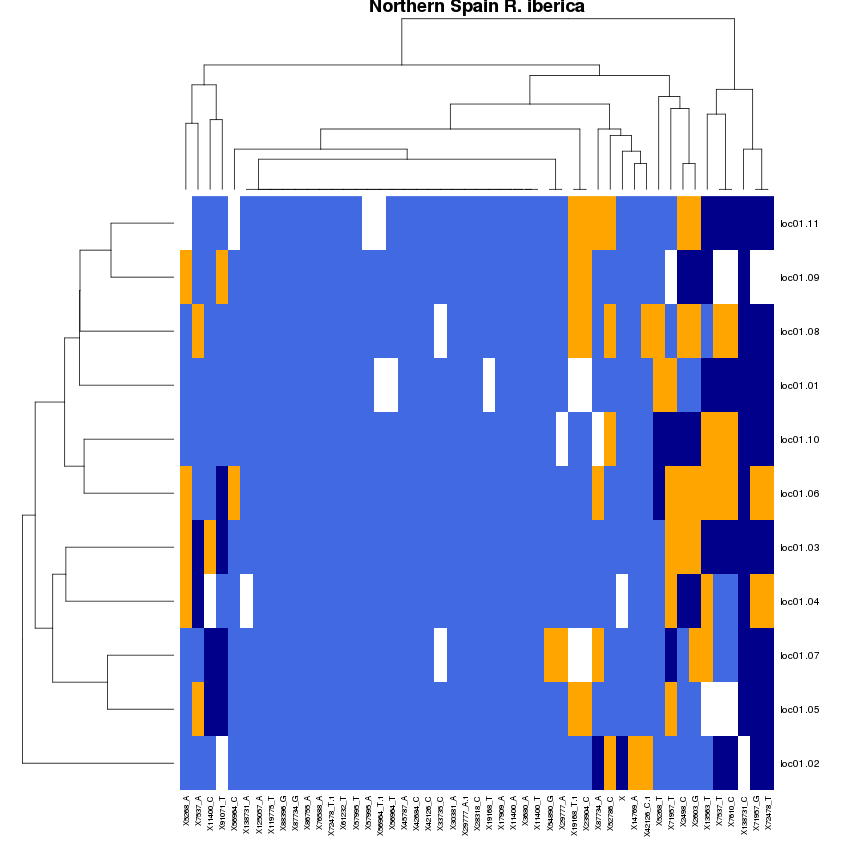

In [132]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_input_Loc01.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

svg("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap01.svg")
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")
dev.off()

heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")

### Loc 11

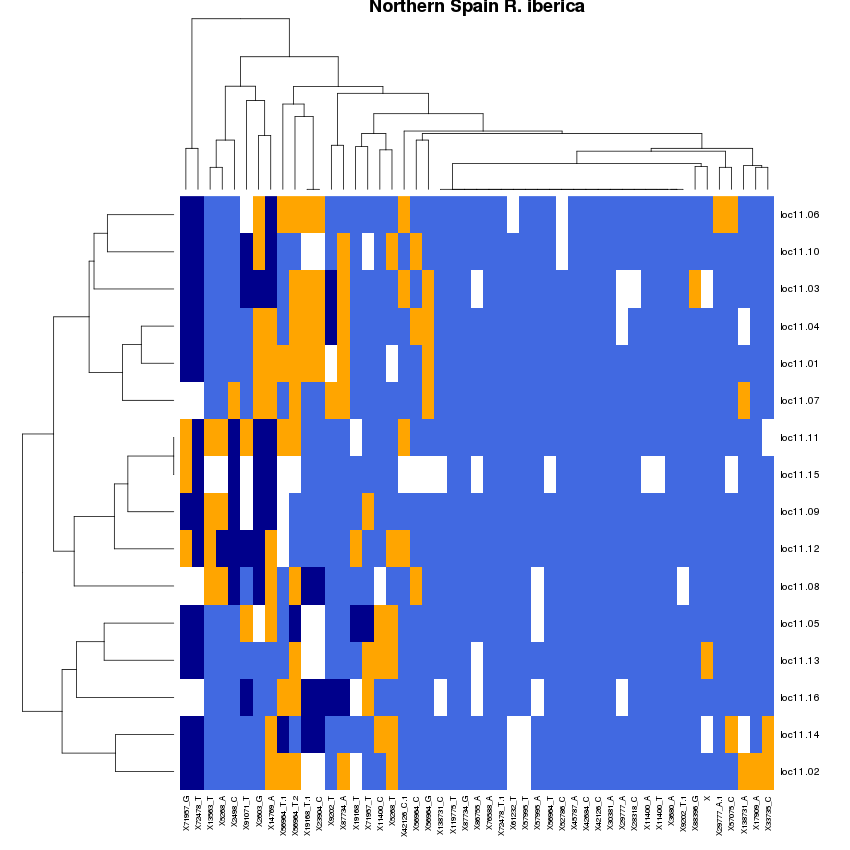

In [134]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_input_Loc11.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

svg("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_Loc11.svg")
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")
dev.off()
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")

### Loc 14

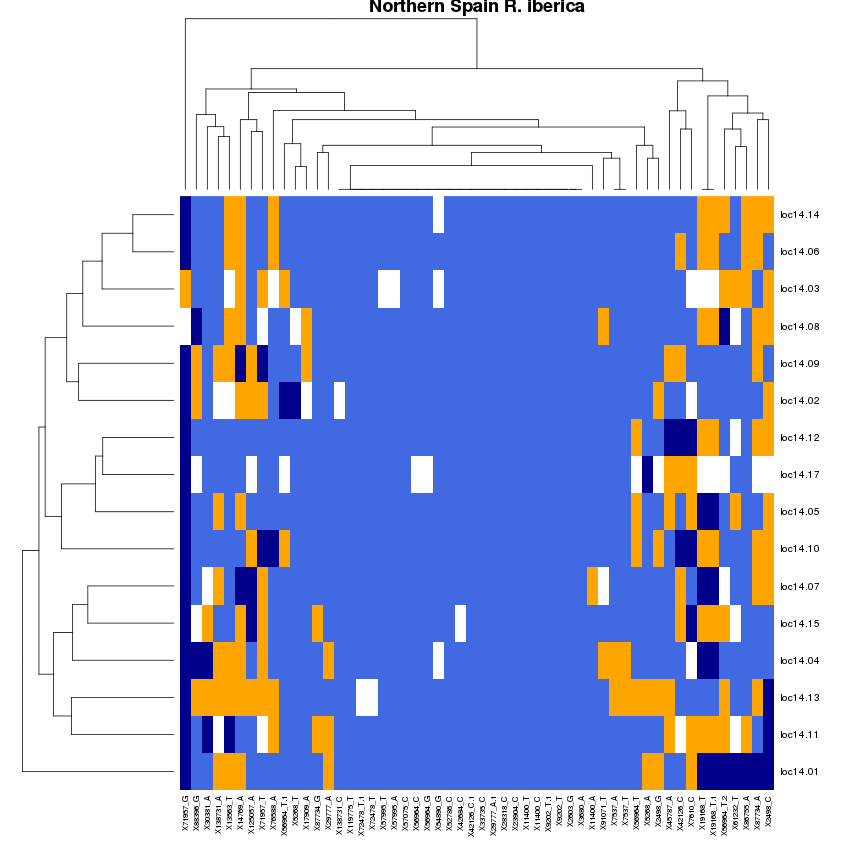

In [135]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_input_Loc14.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

svg("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_Loc14.svg")
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")
dev.off()
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")

### Loc 21

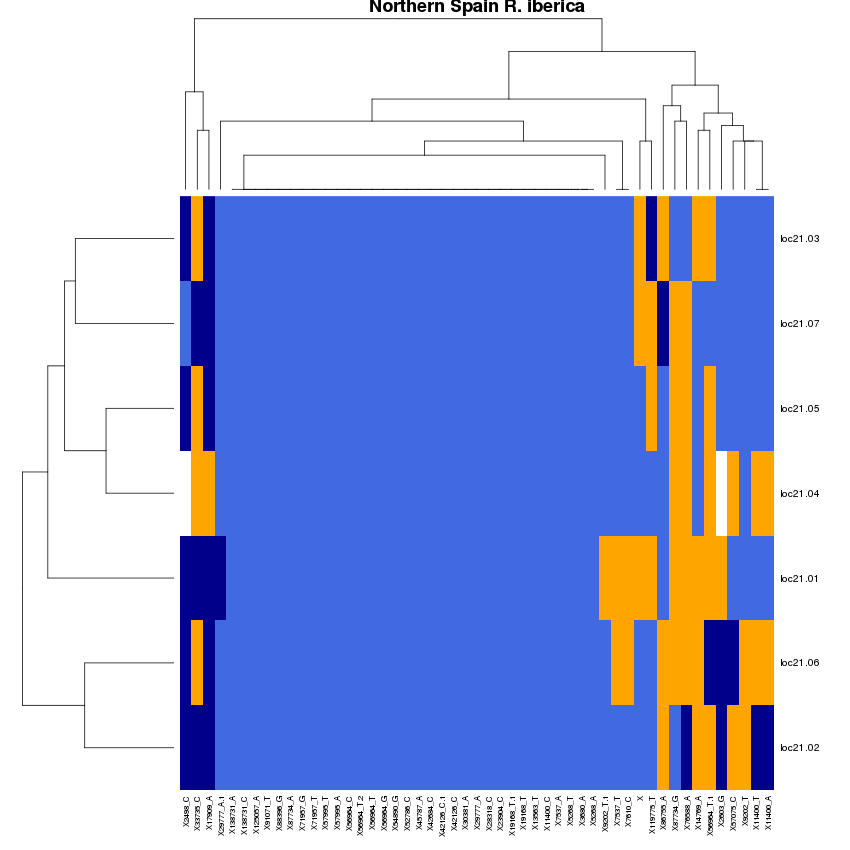

In [138]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_input_Loc21.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

svg("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_Loc21.svg")
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")
dev.off()
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")

### Loc 22

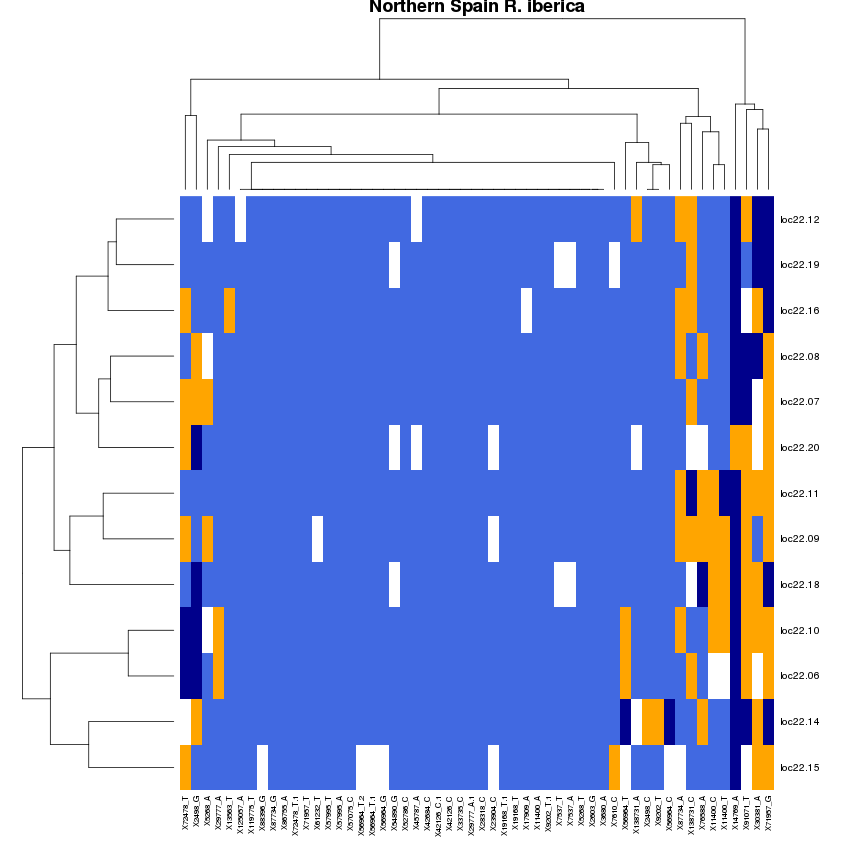

In [139]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_input_Loc22.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

svg("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_Loc22.svg")
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")
dev.off()
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")

### Loc 32

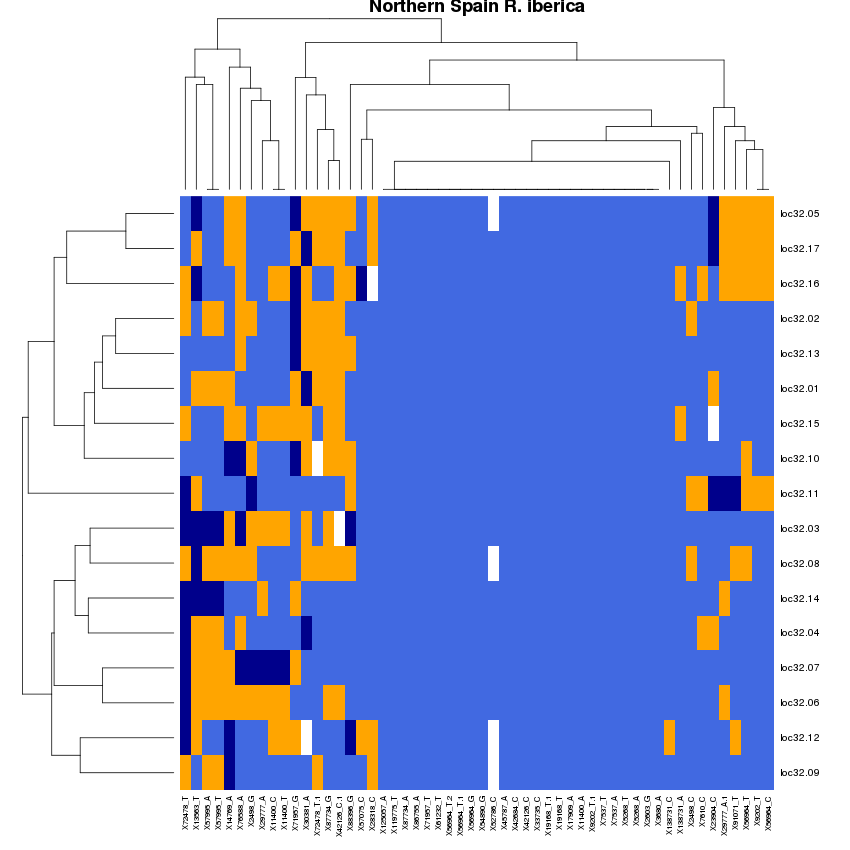

In [140]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_input_Loc32.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

svg("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_Loc32.svg")
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")
dev.off()
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")

### Loc 34

In [ ]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_input_Loc34.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

svg("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_Loc34.svg")
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")
dev.off()
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")

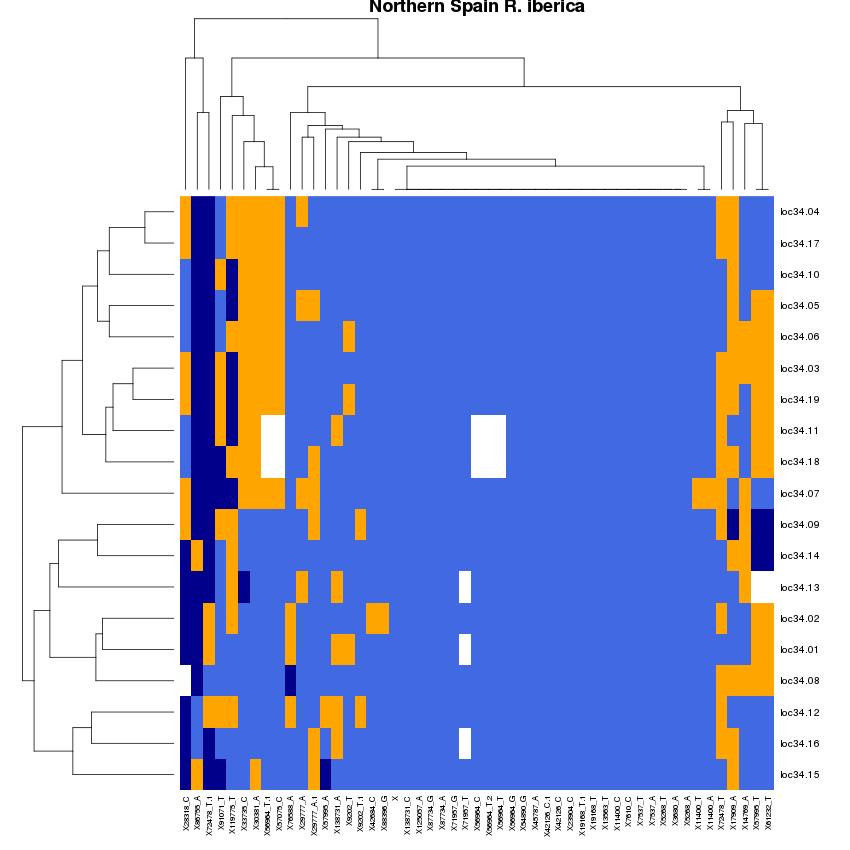

In [133]:
%%R -w 30 -h 30 -u cm

XY_heatmap_data <- read.delim("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_input_Loc34.raw", row.names = 1)
XY_heatmap_data_sorted <- XY_heatmap_data[order(row.names(XY_heatmap_data), decreasing = T), ]
XY_heatmap_data_datmat <- as.matrix(XY_heatmap_data_sorted)

svg("/home/djeffrie/Data/RADseq/Hori/Stacks_new/Populations_all_kept_final/Chr01_linked_snps_heatmap_Loc34.svg")
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")
dev.off()
heatmap_out <- heatmap(XY_heatmap_data_datmat, scale='none', col = c("royalblue", "orange", "darkblue"), cexRow = 1, main = "Northern Spain R. iberica")